In [62]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import os

np.random.seed(42)
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = ""
CHAPTER_ID = "decision_trees"

plt.rcParams['axes.labelsize']= 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [63]:
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)
  
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format= "png", dpi=300)

In [64]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=102)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=102)

In [68]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel('Petal width', fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)


plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, "Depth = 0", fontsize=15)
plt.text(3.2, 1.80, "Depth = 1", fontsize=13)
plt.text(4.05, 0.5, "(Depth = 2)", fontsize=11)

save_fig("decision_tree_decison_boundaries_plot")

Saving figure decision_tree_decison_boundaries_plot


[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

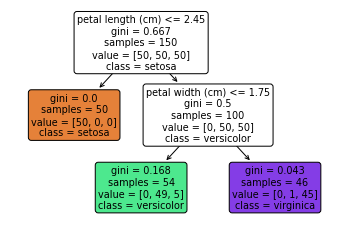

In [73]:
from sklearn import tree

_ = tree.export_graphviz(
    tree_clf,
    out_file=image_path("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

tree.plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)